In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('archive/lightening_strikes_dataset.csv')

## Discovering

In [3]:
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
df.shape

(3401012, 3)

In [5]:
df.drop_duplicates().shape # same value means there are no duplicates in this file

(3401012, 3)

In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   date               3401012 non-null  object
 1   number_of_strikes  3401012 non-null  int64 
 2   center_point_geom  3401012 non-null  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [7]:
# Convert date column to datetime
df.date = pd.to_datetime(df.date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [9]:
# days with most lightning strikes
most_strikes_by_date = df.groupby(['date']).sum(['number_of_strikes']).sort_values(by='number_of_strikes', ascending= False).reset_index()
most_strikes_by_date.head(10)

,date,number_of_strikes
0,2018-08-29,1070457
1,2018-08-17,969774
2,2018-08-28,917199
3,2018-08-27,824589
4,2018-08-30,802170
5,2018-08-19,786225
6,2018-08-18,741180
7,2018-08-16,734475
8,2018-08-31,723624
9,2018-08-15,673455


### Extract Month Data

In [10]:
# new month col
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

In [11]:
df.head()

,date,number_of_strikes,center_point_geom,month,month_name
0,2018-01-03,194,POINT(-75 27),1,January
1,2018-01-03,41,POINT(-78.4 29),1,January
2,2018-01-03,33,POINT(-73.9 27),1,January
3,2018-01-03,38,POINT(-73.8 27),1,January
4,2018-01-03,92,POINT(-79 28),1,January


In [12]:
# months with most strikes
most_strikes_by_month = df.groupby(['month', 'month_name']).sum(['number_of_strikes']).sort_values(by=['number_of_strikes'], ascending = False).reset_index()
most_strikes_by_month

,month,month_name,number_of_strikes
0,8,August,15525255
1,7,July,8320400
2,6,June,6445083
3,5,May,4166726
4,9,September,3018336
5,2,February,2071315
6,4,April,1524339
7,10,October,1093962
8,1,January,860045
9,3,March,854168


## Visualization

In [13]:
df_by_month = df.groupby(['month', 'month_name'])['number_of_strikes'].sum().reset_index()
x = df_by_month['month_name'].str.slice(stop=3)
y = df_by_month.number_of_strikes
df_by_month

,month,month_name,number_of_strikes
0,1,January,860045
1,2,February,2071315
2,3,March,854168
3,4,April,1524339
4,5,May,4166726
5,6,June,6445083
6,7,July,8320400
7,8,August,15525255
8,9,September,3018336
9,10,October,1093962


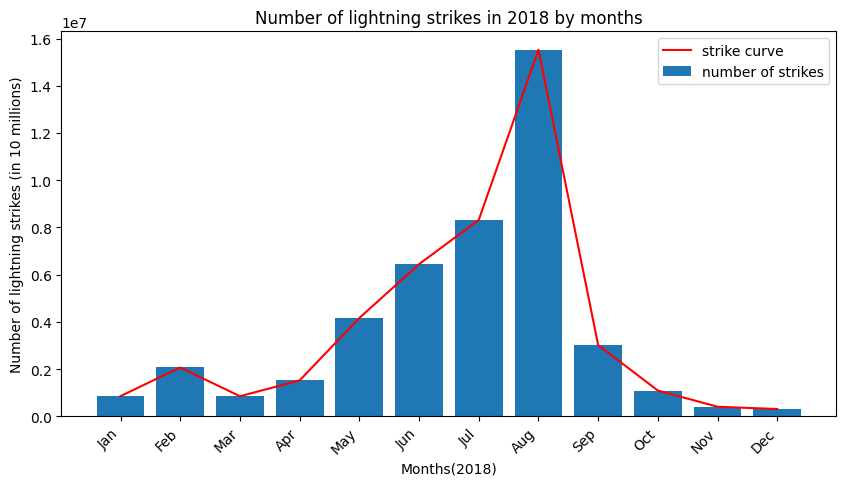

In [14]:
plt.figure(figsize=(10,5))
plt.bar(x=x, height=y, label="number of strikes") # bar graph
plt.plot(x,y, color='red', label='strike curve') # line graph
plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes (in 10 millions)")
plt.title("Number of lightning strikes in 2018 by months")
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend()
plt.show()

#### Strftime params
`%Y` - year

`%m` - month

`%q` - quarter ( use `.dt.to_period('Q')` before it to explain q is about quarter )

`%V` - week


In [15]:
# adding week column
df['week'] = df['date'].dt.strftime('W%V')

In [16]:
df.sample(5)

,date,number_of_strikes,center_point_geom,month,month_name,week
1639634,2018-10-10,2,POINT(-86.1 46),10,October,W41
1819303,2018-07-17,3,POINT(-82.4 29.4),7,July,W29
1853595,2018-08-03,3,POINT(-88.1 29.1),8,August,W31
1568379,2018-09-01,2,POINT(-108 31.5),9,September,W35
3067134,2018-05-14,14,POINT(-78.2 38.1),5,May,W20


In [17]:
# adding quarter column
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('Q%q')

In [18]:
df.sample(5)

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter
1041090,2018-09-03,1,POINT(-111.3 37.4),9,September,W36,Q3
3208219,2018-05-14,18,POINT(-104.8 41.4),5,May,W20,Q2
1384926,2018-06-11,2,POINT(-71.2 31.1),6,June,W24,Q2
3262910,2018-09-03,19,POINT(-102.6 30.3),9,September,W36,Q3
480366,2018-04-08,1,POINT(-109.9 45.2),4,April,W14,Q2


### plotting weekly strikes of 2018 bar graph

In [19]:
df_by_week = df.groupby(['week'])['number_of_strikes'].sum().reset_index()


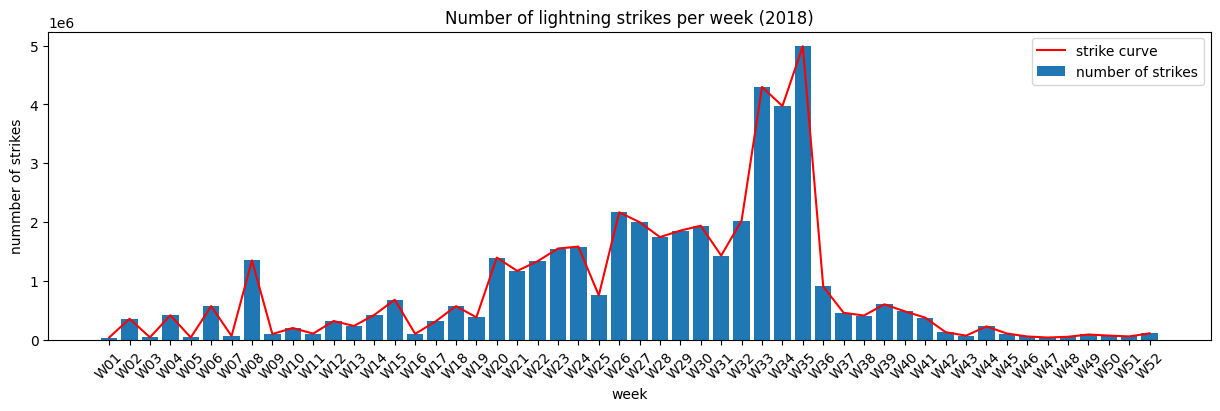

In [20]:
plt.figure(figsize=(15,4))
plt.bar(df_by_week.week, df_by_week.number_of_strikes, label='number of strikes')
plt.plot(df_by_week.week,df_by_week.number_of_strikes, color='red', label='strike curve') # line graph
plt.title('Number of lightning strikes per week (2018)')
plt.xlabel("week")
plt.ylabel("nummber of strikes")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Plotting Quarterly Strikes of 2018 Bar Graph

In [21]:
df_by_Q = df.groupby(['quarter'])['number_of_strikes'].sum().reset_index()

<BarContainer object of 4 artists>

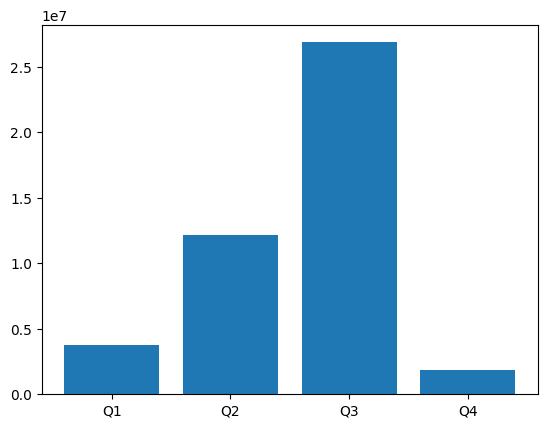

In [22]:
plt.bar(df_by_Q.quarter, df_by_Q.number_of_strikes)

## Structuring The Data

### Sorting - most strikes in a day

In [23]:
df.sort_values(by="number_of_strikes", ascending=False).head(10)

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter
302758,2018-08-20,2211,POINT(-92.5 35.5),8,August,W34,Q3
278383,2018-08-16,2142,POINT(-96.1 36.1),8,August,W33,Q3
280830,2018-08-17,2061,POINT(-90.2 36.1),8,August,W33,Q3
280453,2018-08-17,2031,POINT(-89.9 35.9),8,August,W33,Q3
278382,2018-08-16,1902,POINT(-96.2 36.1),8,August,W33,Q3
11517,2018-02-10,1899,POINT(-95.5 28.1),2,February,W06,Q1
277506,2018-08-16,1878,POINT(-89.7 31.5),8,August,W33,Q3
24906,2018-02-25,1833,POINT(-98.7 28.9),2,February,W08,Q1
284320,2018-08-17,1767,POINT(-90.1 36),8,August,W33,Q3
24825,2018-02-25,1741,POINT(-98 29),2,February,W08,Q1


### Sorting - Identifying location that appear most in dataset, ie-most strikes location

In [24]:
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.7 22.9)     107
POINT(-82.5 22.9)     107
POINT(-84.2 22.3)     106
                     ... 
POINT(-130.2 47.4)      1
POINT(-67.5 41.7)       1
POINT(-60.2 44.1)       1
POINT(-117.8 34.6)      1
POINT(-60.4 44.5)       1
Name: count, Length: 170855, dtype: int64

In [25]:
df.center_point_geom.value_counts().head(20).reset_index().style.background_gradient()

,center_point_geom,count
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


we can see that theres no outlier in the data here, therefore the data is normal

## Grouping - Calculating average number of lightning for each weekday

In [28]:
df.head()

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter
0,2018-01-03,194,POINT(-75 27),1,January,W01,Q1
1,2018-01-03,41,POINT(-78.4 29),1,January,W01,Q1
2,2018-01-03,33,POINT(-73.9 27),1,January,W01,Q1
3,2018-01-03,38,POINT(-73.8 27),1,January,W01,Q1
4,2018-01-03,92,POINT(-79 28),1,January,W01,Q1


In [29]:
df['weekday'] = df.date.dt.day_name()

In [32]:
df.sample(5)

,date,number_of_strikes,center_point_geom,month,month_name,week,quarter,weekday
1773509,2018-06-24,3,POINT(-100.5 23.6),6,June,W25,Q2,Sunday
352862,2018-08-29,60,POINT(-81.9 27.8),8,August,W35,Q3,Wednesday
136743,2018-06-25,36,POINT(-83 37),6,June,W26,Q2,Monday
3190925,2018-07-05,17,POINT(-95.3 32.6),7,July,W27,Q3,Thursday
1869595,2018-08-10,3,POINT(-86.7 49.9),8,August,W32,Q3,Friday


In [39]:
# calculate mean of strikes
df[['weekday','number_of_strikes']].groupby('weekday').mean().sort_values(by='number_of_strikes', ascending=False)

,number_of_strikes
weekday,
Tuesday,13.813599
Friday,13.349972
Thursday,13.240594
Wednesday,13.224568
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
